Code: https://github.com/grasool/explore-gradients/blob/master/README.md

### How to calculate gradients in neural networks?
1. Forward pass - Input is propogated through the network, layer by layer, for computing the output predictions. It has 2 layers - linear transformation & activation function.

2. Loss calculation - After forward passing is done, the output predictions are compared to true labels to compute the loss.

3. Backpropogation - Used to calculate the gradients of the loss function wrt the weights of the network. It has 2 steps - backward pass & gradient calculation.

4. Weight update - After calculating the gradients, the total weights of the network are updated to minimize the loss function.

### What is vanishing gradient problem?
Vanishing gradient problem is a phenomenon that occurs during the training of deep neural networks, where the gradients that are used to update the network become extremely small or "vanish" as they are backpropogated from the output layers to the earlier layers.

During the training process of the neural network, the goal is to minimize a loss function by adjusting the weights of the network.

The backpropogation algorithm calculates these gradients by propogating the error from the output layer to the ### input layer.

### What causes the vanishing gradient problem?
The vanishing gradient problem is caused by the fact that while the process of backpropagation goes on, the gradient of the early layers (the layers that are nearest to the input layer are derived by multiplying the gradients of the later layers (the layers that are near the output layer). Therefore, if the gradients of later ### layers are less than one, their multiplication vanishes at a particularly rapid pace.

### How do you know if your model is suffering from the vanishing gradient problem?
Here are some signs that are indicators of your problem suffering from the vanishing gradient problem:

The parameters of the higher layers change to a great extent, while the parameters of lower layers barely change (or, do not change at all).
The model weights could become 0 during training.
The model learns at a particularly slow pace and the training could stagnate at a very early phase after only a few iterations.

### How do you overcome the vanishing gradient problem?
Here are some methods that are proposed to overcome the vanishing gradient problem:

1. Residual neural networks (ResNets)

2. Multi-level hierarchy

3. Long short term memory (LSTM)

4. ReLU

5. Batch normalization

6. Weight initialization

7. Gradient clipping

8. Skip connections

9. Gated architectures

10. Reduced network depth

https://www.engati.com/glossary/vanishing-gradient-problem#:~:text=The%20vanishing%20gradient%20problem%20is,are%20near%20the%20output%20layer).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Input
from keras.models import Sequential

In [2]:
X,y = make_moons(n_samples=250, noise=0.05, random_state=42)

In [3]:
X.shape

(250, 2)

In [4]:
X[:2]

array([[0.0841541 , 0.1133412 ],
       [1.05091536, 0.15471024]])

In [5]:
y

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0])

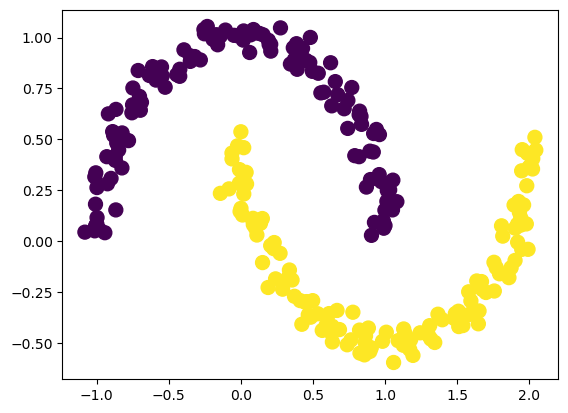

In [6]:
plt.scatter(X[:, 0], X[:, 1],c=y, s=100)

In [22]:
model = Sequential()

model.add(Input(shape=(2,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))

In [23]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
model.get_weights()[0]

array([[-0.3715877 , -0.05920249, -0.38872626, -0.62033   ,  0.38457435,
         0.3335758 ,  0.46688193,  0.21027553,  0.03696835, -0.49916297],
       [ 0.60405296, -0.48910218, -0.5047402 ,  0.42250055,  0.6111316 ,
        -0.32191172,  0.27108938,  0.19014704,  0.4506052 ,  0.03450662]],
      dtype=float32)

In [25]:
old_weights = model.get_weights()[0]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [27]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.4789 - loss: 4.2707
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.4966 - loss: 1.5820
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.4937 - loss: 1.3442
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.4934 - loss: 1.2549
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.4867 - loss: 1.2078
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.4934 - loss: 1.1428
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.5101 - loss: 1.0819
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.5697 - loss: 0.9253
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.5296 - loss: 0.9737
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.5379 - loss: 0.9222
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.5220 - loss: 0.9298
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy:

In [28]:
new_weights = model.get_weights()[0]

In [29]:
model.optimizer.get_config()["learning_rate"]

0.0010000000474974513

In [30]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [31]:
gradient

array([[ 110.12631  ,  -34.714077 ,  -60.507088 ,  163.59709  ,
         -86.74538  ,  -13.364642 ,    2.1795928,   27.2585   ,
          54.240364 ,  124.97723  ],
       [ 138.70242  ,   57.10852  ,   -6.370157 ,   -5.800783 ,
         138.4217   ,   33.655224 ,  -34.791706 ,  -23.793995 ,
        -166.48494  , -110.89685  ]], dtype=float32)

In [32]:
percent_change

array([[ 29.636696  ,  58.63618   ,  15.5654745 ,  26.372595  ,
         22.556204  ,   4.006479  ,   0.46684027,  12.96323   ,
        146.7211    ,  25.03736   ],
       [ 22.961964  ,  11.676194  ,   1.2620666 ,   1.3729647 ,
         22.650066  ,  10.4548    ,  12.834036  ,  12.513472  ,
         36.946964  , 321.3785    ]], dtype=float32)

In [33]:
model = Sequential()

model.add(Input(shape=(2,)))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
old_weights = model.get_weights()[0]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [37]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - accuracy: 0.5228 - loss: 0.6932
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.6491 - loss: 0.6920
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.8421 - loss: 0.6894
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.9106 - loss: 0.6858
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.8879 - loss: 0.6807
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.9269 - loss: 0.6757
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.9174 - loss: 0.6682
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.9173 - loss: 0.6610
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.9234 - loss: 0.6509
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.9356 - loss: 0.6395
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.9313 - loss: 0.6258
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: